<a href="https://colab.research.google.com/github/NewColab/data_Science/blob/main/orignal_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd

import kagglehub
#organizations_uciml_sms_spam_collection_dataset_path = kagglehub.dataset_download('organizations/uciml/sms-spam-collection-dataset')
sms_spam_collection_dataset_path = kagglehub.dataset_download('uciml/sms-spam-collection-dataset')
print('Data source import complete.')

#sms_spam_collection_dataset_path.to_csv("spam.csv")

Data source import complete.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [3]:
# load the datasets using pandas
df=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding='ISO-8859-1',usecols=["v1","v2"])

df.to_csv("spam.csv")

In [4]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.shape

(5572, 2)

In [8]:
df.rename(columns={'v1':"target","v2":"text"},inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
print(encoder.classes_)
print(encoder.transform(["ham", "spam"]))

['ham' 'spam']
[0 1]


In [14]:
df.isnull().sum()

,0
target,0
text,0


In [15]:
df.duplicated().sum()

np.int64(403)

In [16]:
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.shape

(5169, 2)

# EDA

In [19]:
df['target'].value_counts()

,count
target,
0,4516
1,653


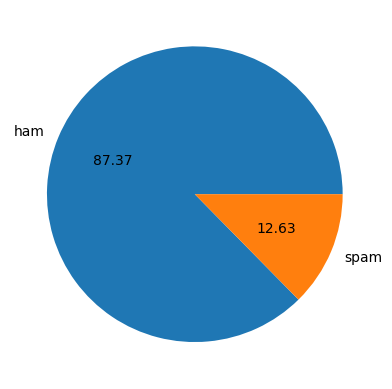

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [27]:
#!pip install nltk
import nltk
nltk.download('punkt_tab',quiet=True)
nltk.download('punkt',quiet=True)
#nltk.download("all")

True

In [28]:
# text counting
df['characters'] = df['text'].apply(len)
df['characters']

,characters
0,111
1,29
2,155
3,49
4,61
...,...
5567,161
5568,37
5569,57
5570,125


In [29]:
df.head()

,target,text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
from nltk.tokenize import word_tokenize

# word counts
df['words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['words']

,words
0,24
1,8
2,37
3,13
4,15
...,...
5567,35
5568,9
5569,15
5570,27


In [31]:
# Sentences counts
df['sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df['sentences']

,sentences
0,2
1,2
2,2
3,1
4,1
...,...
5567,4
5568,1
5569,2
5570,1


In [32]:
df.head()

,target,text,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['characters','words','sentences']].describe()

,characters,words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
#for ham messages
df[df['target'] == 0][['characters','words','sentences']].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#for spam messages
df[df['target'] == 1][['characters','words','sentences']].describe()

,characters,words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
!pip install seaborn
import seaborn as sns

<Axes: xlabel='characters', ylabel='Count'>

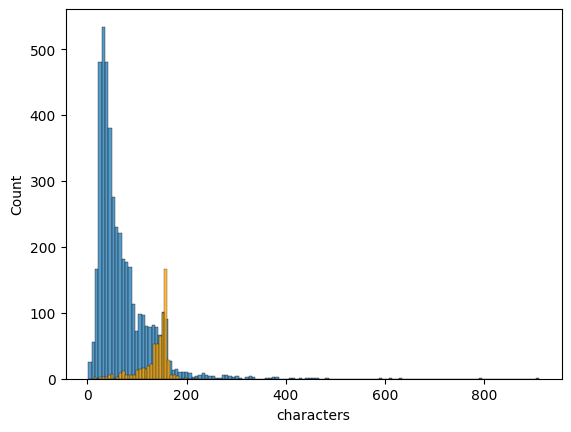

In [37]:
sns.histplot(df[df['target'] == 0]['characters'])
sns.histplot(df[df['target'] == 1]['characters'],color='orange')

<Axes: xlabel='words', ylabel='Count'>

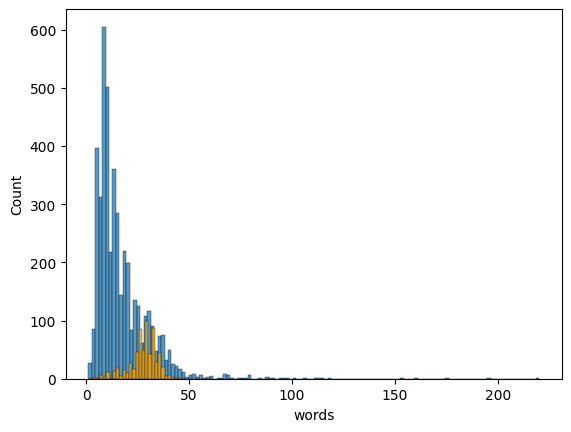

In [38]:
sns.histplot(df[df['target'] == 0]['words'])
sns.histplot(df[df['target'] == 1]['words'],color='orange')

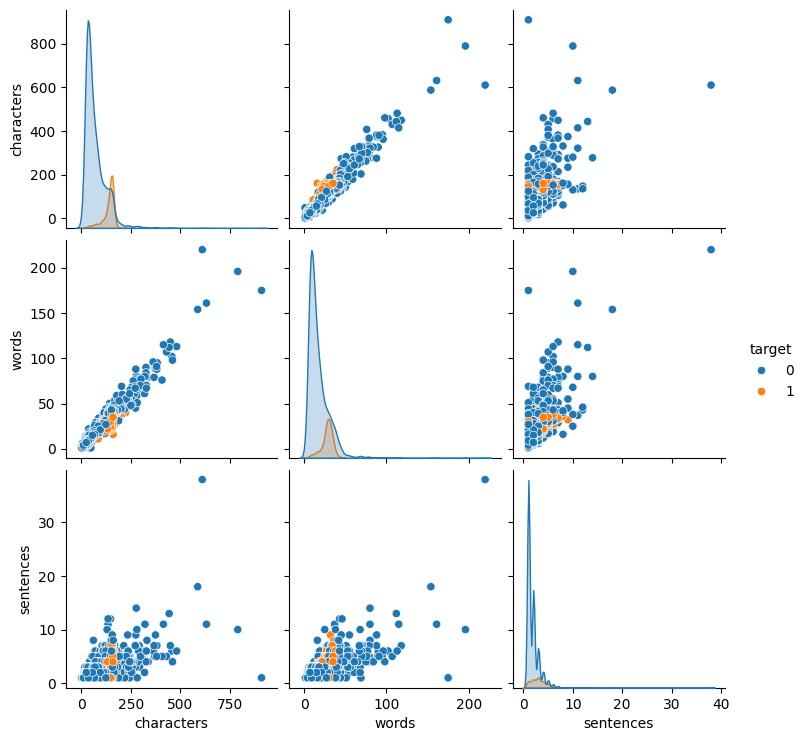

In [39]:
sns.pairplot(df,hue='target')

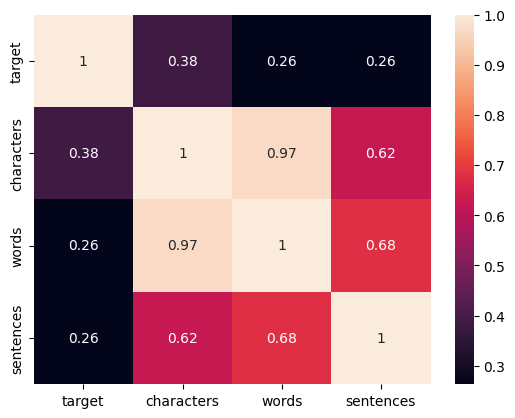

In [40]:
numeric_df = df.select_dtypes(include=['float64','int32','int64'])
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

# Data Preprocessing

In [49]:
nltk.download('all')
import string
string.punctuation

from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

In [50]:
def transform(text):
    text = text.lower()                     #Lower_case
    text = nltk.word_tokenize(text)         #word_tokenization

    y=[]
    for i in text:
        if i.isalnum():                     #removing non alpha-numeric characters
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:                          #removing stopwords and punctuations
        if i not in english_stopwords and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))                #stemming

    return " ".join(y)

In [51]:
df['transformed_text'] = df['text'].apply(transform)

df['transformed_text']

,transformed_text
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
2,free entri 2 wkli comp win fa cup final tkt 21...
3,u dun say earli hor u c alreadi say
4,nah think goe usf live around though
...,...
5567,2nd time tri 2 contact u pound prize 2 claim e...
5568,b go esplanad fr home
5569,piti mood suggest
5570,guy bitch act like interest buy someth els nex...


In [52]:
df.head()

,target,text,characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [54]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))     # for spam

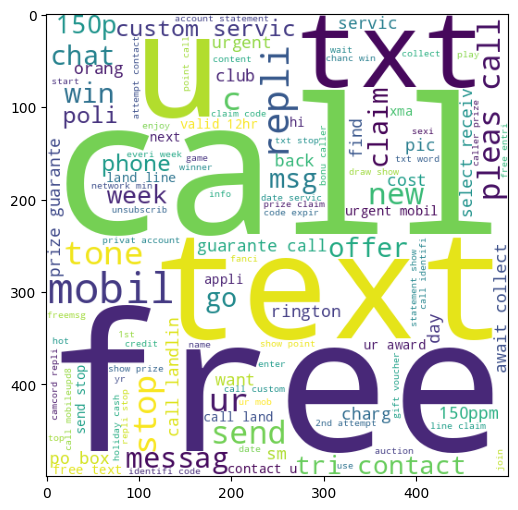

In [55]:
plt.figure(figsize=(13,6))        #for spam
plt.imshow(spam_wc)

In [56]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))     #for ham
ham_wc

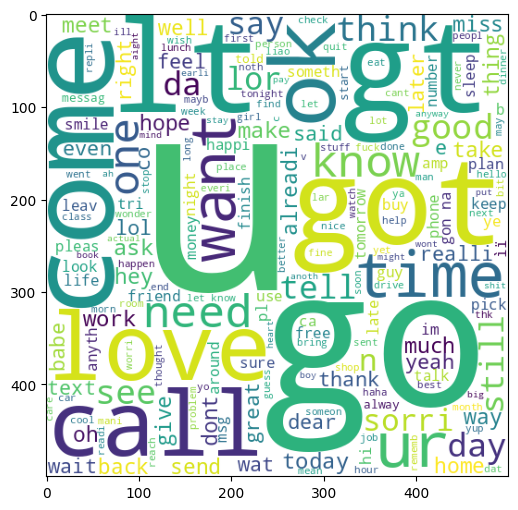

In [57]:
plt.figure(figsize=(13,6))        #for ham
plt.imshow(ham_wc)

In [58]:
spam_corpus = []
for message in df[df['target'] == 1]['transformed_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)


In [59]:
len(spam_corpus)

9939

<ipython-input-60-06fa4f28e0d4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Count', data=word_counts_df,palette="bright")


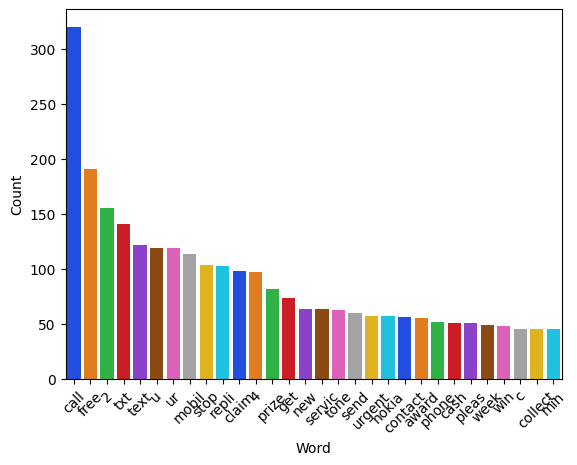

In [60]:
from collections import Counter
word_counter = Counter(spam_corpus)

# Convert Counter data to a DataFrame
word_counts_df = pd.DataFrame(word_counter.most_common(30), columns=['Word', 'Count'])

# Create a barplot using seaborn
sns.barplot(x='Word', y='Count', data=word_counts_df,palette="bright")


plt.xticks(rotation=45)
plt.show()

In [61]:
ham_corpus = []
for message in df[df['target'] == 0]['transformed_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)

In [62]:
len(ham_corpus)

35404

<ipython-input-63-31dd35b44b14>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Count', data=word_counts_df2,palette="colorblind")


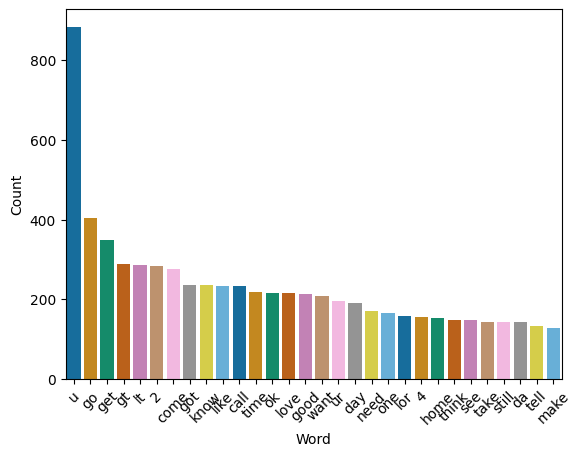

In [63]:
word_counter2 = Counter(ham_corpus)

# Convert Counter data to a DataFrame
word_counts_df2 = pd.DataFrame(word_counter2.most_common(30), columns=['Word', 'Count'])

# Create a barplot using seaborn
sns.barplot(x='Word', y='Count', data=word_counts_df2,palette="colorblind")

plt.xticks(rotation=45)
plt.show()

# Model Building

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [65]:
df['transformed_text']

,transformed_text
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
2,free entri 2 wkli comp win fa cup final tkt 21...
3,u dun say earli hor u c alreadi say
4,nah think goe usf live around though
...,...
5567,2nd time tri 2 contact u pound prize 2 claim e...
5568,b go esplanad fr home
5569,piti mood suggest
5570,guy bitch act like interest buy someth els nex...


In [66]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [69]:
##------------
print(X_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [70]:
from sklearn.naive_bayes import MultinomialNB                  #performs best with best precision
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, classification_report, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
mnb = MultinomialNB()


In [71]:
#Here MultinomialNB is best, as data is imbalanced, so precision matters alot.
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
# Print accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred2),"\n")

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2),"\n")

# Print precision score
print("Precision Score:", precision_score(y_test, y_pred2),"\n")

#print confusion matrix report
print("Confusion matrix report : \n ",classification_report(y_test, y_pred2))

Accuracy Score: 0.9709864603481625 

Confusion Matrix:
 [[896   0]
 [ 30 108]] 

Precision Score: 1.0 

Confusion matrix report : 
                precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.78      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



__________________________________________________________________________________________________________
precision :  1.0
__________________________________________________________________________________________________________
Recall :  0.782608695652174
__________________________________________________________________________________________________________
F1 :  0.8780487804878049
__________________________________________________________________________________________________________
Macro Precision :  0.9838012958963283
__________________________________________________________________________________________________________
Weighted Precision :  0.971926423835803
__________________________________________________________________________________________________________
Macro recall :  0.8913043478260869
__________________________________________________________________________________________________________
Weighted recall :  0.9709864603481625
______________________________

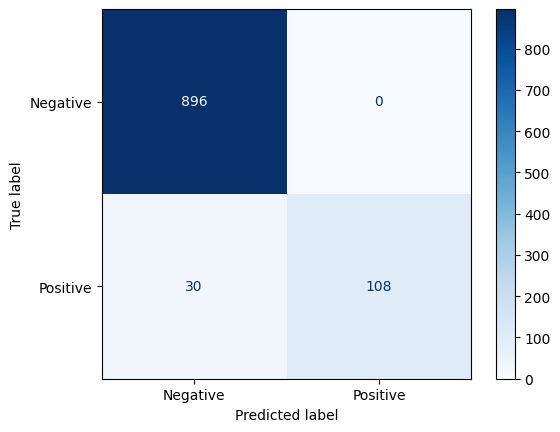

In [72]:
disp=ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred2),display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)

print("__________________________________________________________________________________________________________")
print("precision : ",precision_score(y_test, y_pred2))
print("__________________________________________________________________________________________________________")
print("Recall : ",recall_score(y_test, y_pred2))
print("__________________________________________________________________________________________________________")
print("F1 : ",f1_score(y_test, y_pred2))
print("__________________________________________________________________________________________________________")
print("Macro Precision : ",precision_score(y_test, y_pred2, average=("macro")))
print("__________________________________________________________________________________________________________")
print("Weighted Precision : ",precision_score(y_test, y_pred2, average=("weighted")))
print("__________________________________________________________________________________________________________")
print("Macro recall : ",recall_score(y_test, y_pred2, average=("macro")))
print("__________________________________________________________________________________________________________")
print("Weighted recall : ",recall_score(y_test, y_pred2, average=("weighted")))
print("__________________________________________________________________________________________________________")

# Predictions With model

In [73]:
# prediction is
inputs=["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]
inputtrans=tfidf.transform(inputs)
prediction=mnb.predict(inputtrans)
#print("Ham means is {}".format(prediction))


if prediction==[0]:
    print("Ham")
else:
    print("spam")


print(inputtrans)

Ham
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10 stored elements and shape (1, 3000)>
  Coords	Values
  (0, 573)	0.41876076228715325
  (0, 662)	0.37016492180695976
  (0, 1222)	0.17584813319949288
  (0, 1240)	0.20333000074278623
  (0, 1251)	0.24552395968050814
  (0, 1491)	0.37016492180695976
  (0, 2003)	0.2999554393348548
  (0, 2636)	0.41876076228715325
  (0, 2872)	0.24260866780467016
  (0, 2937)	0.3063573208773264


In [74]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer()
inputs=["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]
t1=transformer.transform(inputs)

inputtrans=tfidf.transform(t1)
prediction=mnb.predict(inputtrans)
prediction

array([0])

In [75]:
inputtrans

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10 stored elements and shape (1, 3000)>

# own model make a pickle file

In [76]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [77]:
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
import re

def transforms(text):

    text=text.lower()
    # Remove numbers and punctuation using regular expressions
    text1 = re.sub(r'[0-9\W_]', ' ', text)
    # initializing stopwords
    stop_words=set(stopwords.words('english'))
    # word tokenize
    wordtokenize=word_tokenize(text1)

    # remove stop_words
    filtered=[]
    for w in wordtokenize:
        if w.lower() not in stop_words:
            filtered.append(w)

    return filtered


text = "Hello! an i How are you? I'm for did do 25 years old."

t1=transforms(text)
t11=pd.Series(t1)
t11

,0
0,hello
1,years
2,old


In [78]:

t1=transformer.transform(t11)
t12=tfidf.transform(t1)

with open('/content/model.pkl','rb') as f:
        model=pickle.load(f)
        result=model.predict(t12)
        print(result)

[0 0 0]


In [263]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer1 = FunctionTransformer()
inputs=["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]
t1=transformer1.transform(inputs)

inputtrans=tfidf1.transform(t1)
prediction=model.predict(inputtrans)
prediction

array([0])

In [258]:
#  for running offline code is
import numpy as np
import pickle
from sklearn.preprocessing import FunctionTransformer
transformer1 = FunctionTransformer()

with open('/content/vectorizer.pkl','rb') as f:
        tfidf1=pickle.load(f)

#inputs=["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]
inputs=["you got worth sale"]
t1=transformer1.transform(inputs)

with open('/content/model.pkl','rb') as f:
        model=pickle.load(f)


inputtrans=tfidf1.transform(t1)
prediction=model.predict(inputtrans)
prediction


array([0])

In [81]:
df2=pd.read_csv("/content/spam.csv")

In [82]:
df[df2["v1"]=="spam"]

<ipython-input-82-5bc551aebc17>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df2["v1"]=="spam"]


,target,text,characters,words,sentences,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...


In [83]:
import pandas as pd
emaildf = pd.read_csv('https://query.data.world/s/nranqlbxalwyw67lyysn6supkgvkeg?dws=00000')

In [84]:
emaildf.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [85]:
emaildf.to_csv("email.csv")

In [86]:
df.head()

,target,text,characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [88]:
#df.v1.replace({"ham": 0, "spam": 1}, inplace=True)
spam2=df.copy()

#emaildf.rename(columns={"v1": "spam","v2": "text"}, inplace=True)

In [94]:
spam2.head()

,target,text,characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [96]:
spam2.drop(columns=['text', 'characters', 'words', 'sentences'], inplace=True)
spam2.columns

Index(['target', 'transformed_text'], dtype='object')

In [98]:
spam2.rename(columns={"target": "spam", "transformed_text": "text"}, inplace=True)

In [93]:
emaildf.spam.value_counts()

,count
spam,
0,4360
1,1368


In [99]:
spam2.head()

,spam,text
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though


In [90]:
emaildf.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [106]:
new_datasets=pd.concat([spam2,emaildf])
print(new_datasets.head())
print(new_datasets.tail())
new_datasets.shape

   spam                                               text
0     0  go jurong point crazi avail bugi n great world...
1     0                              ok lar joke wif u oni
2     1  free entri 2 wkli comp win fa cup final tkt 21...
3     0                u dun say earli hor u c alreadi say
4     0               nah think goe usf live around though
      spam                                               text
5723     0  Subject: re : research and development charges...
5724     0  Subject: re : receipts from visit  jim ,  than...
5725     0  Subject: re : enron case study update  wow ! a...
5726     0  Subject: re : interest  david ,  please , call...
5727     0  Subject: news : aurora 5 . 2 update  aurora ve...


(10897, 2)

In [108]:
new_datasets.to_csv("new_datasets.csv")

new_datasets.spam.value_counts()

,count
spam,
0,8876
1,2021


In [109]:
from sklearn.model_selection import train_test_split

In [269]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf22 = TfidfVectorizer(max_features=6500)

In [270]:
X1 = tfidf22.fit_transform(new_datasets['text']).toarray()

In [271]:
y1 = new_datasets['spam'].values
y1

array([0, 0, 1, ..., 0, 0, 0])

In [272]:
X1

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.12057541, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [273]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.2, random_state=42)

In [274]:
X_train.shape

(8717, 6500)

In [275]:
y_train.shape

(8717,)

In [276]:
from sklearn.naive_bayes import MultinomialNB
mnb1=MultinomialNB(alpha=0.15)

mnb1.fit(X_train,y_train)
y_pred11=mnb1.predict(X_test)

In [277]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, classification_report, precision_score, recall_score, ConfusionMatrixDisplay, f1_score# Print accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred11),"\n")

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred11),"\n")

# Print precision score
print("Precision Score:", precision_score(y_test, y_pred11),"\n")

#print confusion matrix report
print("Confusion matrix report : \n ",classification_report(y_test, y_pred11))

Accuracy Score: 0.981651376146789 

Confusion Matrix:
 [[1775   12]
 [  28  365]] 

Precision Score: 0.9681697612732095 

Confusion matrix report : 
                precision    recall  f1-score   support

           0       0.98      0.99      0.99      1787
           1       0.97      0.93      0.95       393

    accuracy                           0.98      2180
   macro avg       0.98      0.96      0.97      2180
weighted avg       0.98      0.98      0.98      2180



__________________________________________________________________________________________________________
precision :  0.9681697612732095
__________________________________________________________________________________________________________
Recall :  0.9287531806615776
__________________________________________________________________________________________________________
F1 :  0.948051948051948
__________________________________________________________________________________________________________
Macro Precision :  0.9763200442528
__________________________________________________________________________________________________________
Weighted Precision :  0.9815317389654373
__________________________________________________________________________________________________________
Macro recall :  0.9610190077902181
__________________________________________________________________________________________________________
Weighted recall :  0.981651376146789
__________________

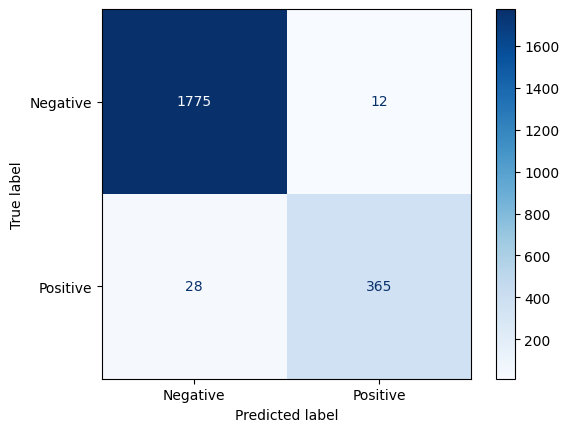

In [278]:
disp=ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred11),display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)

print("__________________________________________________________________________________________________________")
print("precision : ",precision_score(y_test, y_pred11))
print("__________________________________________________________________________________________________________")
print("Recall : ",recall_score(y_test, y_pred11))
print("__________________________________________________________________________________________________________")
print("F1 : ",f1_score(y_test, y_pred11))
print("__________________________________________________________________________________________________________")
print("Macro Precision : ",precision_score(y_test, y_pred11, average=("macro")))
print("__________________________________________________________________________________________________________")
print("Weighted Precision : ",precision_score(y_test, y_pred11, average=("weighted")))
print("__________________________________________________________________________________________________________")
print("Macro recall : ",recall_score(y_test, y_pred11, average=("macro")))
print("__________________________________________________________________________________________________________")
print("Weighted recall : ",recall_score(y_test, y_pred11, average=("weighted")))
print("__________________________________________________________________________________________________________")

In [288]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer1 = FunctionTransformer()
#inputs=["""You have been selected as the lucky winner of our $1,000 Walmart Gift Card giveaway! 🎉
#To claim your reward, simply click the link below and complete a short survey."""]


inputs=["This is a fake email written in the style of spam for machine learning training/testing only."]


t1=transformer1.transform(inputs)

inputtrans=tfidf22.transform(t1)
prediction=mnb1.predict(inputtrans)
if prediction==[1]:
  print("spam")
else:
  print("not spam")

not spam


In [289]:
import pickle
pickle.dump(tfidf22,open('new_vectorizer.pkl','wb'))
pickle.dump(mnb1,open('new_model.pkl','wb'))

In [292]:
#  for running offline code is
import numpy as np
import pickle
from sklearn.preprocessing import FunctionTransformer
transformer1 = FunctionTransformer()

with open('/content/new_vectorizer.pkl','rb') as f:
        tfidf_load=pickle.load(f)

#inputs=["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]
inputs=["you got worth sale"]
t1=transformer1.transform(inputs)

with open('/content/new_model.pkl','rb') as f:
        model=pickle.load(f)


inputtrans=tfidf_load.transform(t1)
prediction=model.predict(inputtrans)


if prediction==[1]:
  print("spam")
else:
  print("not spam")


not spam
